In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import mean_squared_error

In [2]:
df_clean=pd.read_csv(r"C:\Users\Dima\Downloads\Dima\Cleaned_df.csv",dtype={'col':np.float})
df_clean.rename(columns={'Unnamed: 0':'Country'},inplace=True)
df_clean.set_index('Country',inplace=True)
df_clean.drop('Unnamed: 8',axis=1,inplace=True)
df_clean

,Alcohol,All Cancers,Alzheimers & Dementia,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,...,Diabetes Rates by Country,Health Care Costs by Country,Infant Mortality Rate by Country,Lactose Intolerance by Country,Most Obese Countries,Obesity Rates by Country,Suicide Rate by Country,Total Fertility Rate,Vaccination Rates by Country,Zika Virus Countries
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,11247.529167,1498.662628,0.000000,68.035126,37.797292,160.638491,6.390294e+04,208.830038,1611.109571,269.305706,...,0.06,9432800.0,2.19,9432800.0,0.245,0.245,21.2,1.4,0.98,No mosquitoes that spread Zika
Mongolia,6372.340102,577.962527,0.000000,197.680887,97.037384,34.094216,3.481675e+04,206.532270,145.228247,188.173846,...,0.07,3378078.0,13.22,3378078.0,0.206,0.206,17.9,2.9,0.99,No mosquitoes that spread Zika
Russia,188532.731458,21992.323423,0.000000,1050.728126,817.232987,3517.020534,1.061629e+06,5312.014417,24152.153461,5166.079955,...,0.06,145805947.0,4.36,145805947.0,0.231,0.231,25.1,1.6,0.97,With mosquitoes but no reported Zika cases
Guatemala,14787.509827,2984.733629,0.000000,498.052790,800.825890,93.160954,1.313068e+05,1270.213771,734.538288,990.730910,...,0.13,18584039.0,20.06,18584039.0,0.212,0.212,5.9,2.9,0.92,Current or past transmission but no Zika outbreak
Slovenia,2796.587398,120.578404,0.207894,4.781557,2.078938,77.752281,8.025948e+03,32.015645,309.345974,47.607680,...,0.06,2078034.0,1.76,2078034.0,0.202,0.202,19.8,1.6,0.92,No mosquitoes that spread Zika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,111929.631992,23088.710939,0.000000,7680.013883,1810.497569,876.047211,6.805329e+05,2326.392038,8010.965052,6414.612356,...,0.06,98953541.0,16.70,98953541.0,NaN,0.021,7.5,2.0,0.96,Current or past transmission but no Zika outbreak
Antigua And Barbuda,118.621398,6.003048,4.651628,1.890030,0.851982,1.047840,5.816787e+02,7.511154,13.866746,4.064053,...,0.12,99509.0,5.38,99509.0,0.189,0.189,0.4,2.0,0.99,Current or past transmission but no Zika outbreak
United Arab Emirates,7174.497611,1677.412179,0.000000,1018.711406,93.958819,344.185990,6.132742e+04,144.399869,844.640331,533.092668,...,0.16,10081785.0,5.62,10081785.0,0.317,0.317,6.4,1.4,0.96,No mosquitoes that spread Zika


In [3]:
def outlier_detection_zscore_dist(df):
    df_copy =df.copy()
    for col in df_copy:
        if (df_copy[col].dtypes!=object):
            z_score=(df_copy[col]-df_copy[col].mean())/df_copy[col].std()
            outliers=abs(z_score) >3
            df_copy.loc[outliers,[col]]=np.nan
    return df_copy
    


values_zscore=outlier_detection_zscore_dist(df_clean)
for i in values_zscore.columns:
    print(values_zscore[i].isna().sum(),  i)

2 Alcohol
3 All Cancers
3 Alzheimers & Dementia
1 Anemia
3 Asthma
2 Birth Trauma
2 Bladder Cancer
4 Breast Cancer
2 Cervical Cancer
3 Colon-Rectum Cancers
2 Congenital Anomalies
4 Coronary Heart Disease
1 Diabetes Mellitus
2 Diarrhoeal diseases
2 Drownings
7 Drug Use
2 Endocrine Disorders
2 Falls
4 Fires
5 Hepatitis C
2 HIV/AIDS
5 Hypertension
2 Inflammatory/Heart
2 Kidney Disease
2 Leukemia
4 Liver Cancer
1 Liver Disease
1 Low Birth Weight
2 Lung Cancers
2 Lung Disease
3 Malaria
3 Malnutrition
2 Multiple Sclerosis
2 Oesophagus Cancer
2 Oral Cancer
3 Other Injuries
3 Other Neoplasms
3 Ovary Cancer
2 Pancreas Cancer
1 Peptic Ulcer Disease
3 Poisonings
3 Prostate Cancer
2 Rheumatic Heart Disease
3 Road Traffic Accidents
2 Skin Cancers
2 Skin Disease
3 Stomach Cancer
2 Stroke
2 Suicide
4 Tuberculosis
3 Uterin Cancer
3 Electricity by Renewable Sources 
11 Urban Population Growth Rates 
3 Infant Mortality Rates 
1 Natural Gas Imports 
4 Internet Users 
2 Gross Domestic Product (GDP) 
7 Inve

In [4]:
for i in values_zscore.columns:
    if(values_zscore[i].dtypes!=object):
        values_zscore[i].fillna(values_zscore[i].median(), inplace=True)
values_zscore.info()
values_zscore


<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Belarus to Republic of the Congo
Columns: 145 entries, Alcohol to Zika Virus Countries
dtypes: float64(139), object(6)
memory usage: 197.3+ KB


,Alcohol,All Cancers,Alzheimers & Dementia,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,...,Diabetes Rates by Country,Health Care Costs by Country,Infant Mortality Rate by Country,Lactose Intolerance by Country,Most Obese Countries,Obesity Rates by Country,Suicide Rate by Country,Total Fertility Rate,Vaccination Rates by Country,Zika Virus Countries
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,11247.529167,1498.662628,0.000000,68.035126,37.797292,160.638491,6.390294e+04,208.830038,1611.109571,269.305706,...,0.06,9432800.0,2.19,9432800.0,0.2450,0.245,21.2,1.4,0.98,No mosquitoes that spread Zika
Mongolia,6372.340102,577.962527,0.000000,197.680887,97.037384,34.094216,3.481675e+04,206.532270,145.228247,188.173846,...,0.07,3378078.0,13.22,3378078.0,0.2060,0.206,17.9,2.9,0.99,No mosquitoes that spread Zika
Russia,188532.731458,21992.323423,0.000000,1050.728126,817.232987,3517.020534,1.061629e+06,5312.014417,24152.153461,5166.079955,...,0.06,145805947.0,4.36,145805947.0,0.2310,0.231,25.1,1.6,0.97,With mosquitoes but no reported Zika cases
Guatemala,14787.509827,2984.733629,0.000000,498.052790,800.825890,93.160954,1.313068e+05,1270.213771,734.538288,990.730910,...,0.13,18584039.0,20.06,18584039.0,0.2120,0.212,5.9,2.9,0.92,Current or past transmission but no Zika outbreak
Slovenia,2796.587398,120.578404,0.207894,4.781557,2.078938,77.752281,8.025948e+03,32.015645,309.345974,47.607680,...,0.06,2078034.0,1.76,2078034.0,0.2020,0.202,19.8,1.6,0.92,No mosquitoes that spread Zika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,111929.631992,23088.710939,0.000000,7680.013883,1810.497569,876.047211,6.805329e+05,2326.392038,8010.965052,6414.612356,...,0.06,98953541.0,16.70,98953541.0,0.2055,0.021,7.5,2.0,0.96,Current or past transmission but no Zika outbreak
Antigua And Barbuda,118.621398,6.003048,4.651628,1.890030,0.851982,1.047840,5.816787e+02,7.511154,13.866746,4.064053,...,0.12,99509.0,5.38,99509.0,0.1890,0.189,0.4,2.0,0.99,Current or past transmission but no Zika outbreak
United Arab Emirates,7174.497611,1677.412179,0.000000,1018.711406,93.958819,344.185990,6.132742e+04,144.399869,844.640331,533.092668,...,0.16,10081785.0,5.62,10081785.0,0.3170,0.317,6.4,1.4,0.96,No mosquitoes that spread Zika


In [5]:
index_object=[]
for i in values_zscore.columns:
    if(values_zscore[i].dtypes==object):
        values_zscore[i]=pd.factorize(values_zscore[i])[0]
        index_object.append(i)

for i in index_object:
    print(values_zscore[i].value_counts())
values_zscore.drop('Most Obese Countries',axis=1,inplace=True) 
values_zscore.drop('Obesity ',axis=1,inplace=True) 
values_zscore.drop('Birth Life Expectancy ',axis=1,inplace=True) 

1    119
0     54
Name: Global North Countries, dtype: int64
1    119
0     54
Name: Global South Countries, dtype: int64
2      3
22     3
20     2
83     2
130    2
      ..
104    1
103    1
102    1
101    1
0      1
Name: GNP/GNI by Country, Length: 159, dtype: int64
4      20
51      7
54      5
5       3
14      3
       ..
99      1
100     1
101     1
102     1
0       1
Name: Major Countries Currencies, Length: 140, dtype: int64
 1    151
 0     17
-1      5
Name: World Trade Organization (WTO) Countries, dtype: int64
 0    71
 2    58
 1    43
-1     1
Name: Zika Virus Countries, dtype: int64


In [6]:
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        print(score , i)
        if(score>=0.5 or score<=-0.5):
            pass  

0.014664916871865727 Alcohol
-0.0714034196133999 All Cancers
0.22843954094484728 Alzheimers & Dementia
-0.2696195154833065 Anemia
-0.2353224374239035 Asthma
0.08550793523342545 Birth Trauma
-0.20129009612324963 Bladder Cancer
-0.3497256782018828 Breast Cancer
0.13603858574632013 Cervical Cancer
-0.08395487964206742 Colon-Rectum Cancers
-0.11283089941707707 Congenital Anomalies
-0.21303994229014034 Coronary Heart Disease
-0.3480817244140434 Diabetes Mellitus
-0.15803852413483951 Diarrhoeal diseases
-0.10210863572701562 Drownings
-0.07320121382481191 Drug Use
-0.1164580476222209 Endocrine Disorders
-0.36298835444026045 Falls
0.06289219423165292 Fires
-0.35902606653735253 Hepatitis C
-0.21544210851864717 HIV/AIDS
-0.1920734139149344 Hypertension
-0.20129009612324963 Inflammatory/Heart
0.06316790284970386 Kidney Disease
-0.026365973545022816 Leukemia
-0.2752987386445265 Liver Cancer
-0.22050132258044358 Liver Disease
0.12895527501387077 Low Birth Weight
-0.08621878271725848 Lung Cancers
-0

In [7]:
machin_value=[]
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        if(score>=0.5 or score<=-0.5):
            print("Taken To The machine Learinging :", i)
            machin_value.append(i)
machin_value.append('Life Expectancy')  
values_zscore[machin_value]

Taken To The machine Learinging : Lung Disease
Taken To The machine Learinging : Urban Population Growth Rates 
Taken To The machine Learinging : Older Population 
Taken To The machine Learinging : Unimproved Drinking Water Sources 
Taken To The machine Learinging : Electrification 
Taken To The machine Learinging : Unimproved Sanitation 
Taken To The machine Learinging : Urban Population 
Taken To The machine Learinging : Median Age 
Taken To The machine Learinging : Young Population 
Taken To The machine Learinging : Best Countries To Live in
Taken To The machine Learinging : Cheapest Countries To Live in
Taken To The machine Learinging : Fourth World Countries
Taken To The machine Learinging : GDP per Capita by Country
Taken To The machine Learinging : Global North Countries
Taken To The machine Learinging : Global South Countries
Taken To The machine Learinging : Most Expensive Countries To Live in
Taken To The machine Learinging : Poorest Countries in the World
Taken To The machin

,Lung Disease,Urban Population Growth Rates,Older Population,Unimproved Drinking Water Sources,Electrification,Unimproved Sanitation,Urban Population,Median Age,Young Population,Best Countries To Live in,...,Most Expensive Countries To Live in,Poorest Countries in the World,Average Height by Country,Countries by IQ - Average IQ by Country,Birth Rate by Country,Depression Rates by Country,Infant Mortality Rate by Country,Obesity Rates by Country,Total Fertility Rate,Life Expectancy
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,0.000000,0.0044,0.159,0.003,1.00,0.057,0.80,40.9,0.161,0.8230,...,504.0,6330.0,178.69,101.60,10.0,0.056,2.19,0.245,1.4,75.058
Mongolia,0.000000,0.0163,0.048,0.356,0.91,0.403,0.69,29.8,0.270,0.7370,...,603.0,3670.0,170.67,91.03,18.2,0.042,13.22,0.206,2.9,70.334
Russia,0.000000,0.0018,0.155,0.031,1.00,0.278,0.75,40.3,0.172,0.8240,...,656.0,10690.0,176.65,96.29,10.7,0.055,4.36,0.231,1.6,72.842
Guatemala,0.000000,0.0268,0.047,0.072,0.92,0.361,0.52,23.2,0.337,0.6630,...,857.0,4490.0,164.36,47.72,24.6,0.037,20.06,0.212,2.9,74.828
Slovenia,0.000000,0.0056,0.212,0.005,1.00,0.009,0.55,44.9,0.148,0.9170,...,1175.0,25910.0,180.98,98.60,9.2,0.051,1.76,0.202,1.6,81.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,19.467716,0.0298,0.069,0.024,1.00,0.220,0.37,31.9,0.226,0.7040,...,639.0,2660.0,168.89,89.53,15.2,0.040,16.70,0.021,2.0,75.670
Antigua And Barbuda,0.000000,0.0055,0.089,0.021,1.00,0.086,0.24,32.7,0.225,0.7780,...,1465.0,14250.0,178.84,70.48,15.6,0.051,5.38,0.189,2.0,77.340
United Arab Emirates,0.000000,0.0171,0.019,0.004,1.00,0.024,0.87,38.4,0.145,0.8900,...,1576.0,43470.0,174.08,82.05,9.8,0.051,5.62,0.317,1.4,78.318


In [9]:
# With Normalize the data 
df_scale=values_zscore[machin_value]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_scale)
df_scaled=pd.DataFrame(x_scaled)
df_scaled
X_1=df_scaled.loc[:,0:23]
y_1=df_scaled.loc[:,24]
m_1=linear_model.LinearRegression()
m_1.fit(X_1,y_1)
print("Slope:",m_1.coef_)
print("Intercept:",m_1.intercept_)

## מקדמים של המשתנים 

Slope: [ 0.00375777  0.12421974  0.1654801   0.02060496  0.14262171 -0.15654992
  0.04483488  0.02785827  0.11260015  0.18501926  0.04293848 -0.07237136
  0.00978469  0.01231169  0.01231169  0.04293848  0.08161779 -0.08166402
  0.02904936 -0.04089682 -0.05141462 -0.28820844 -0.019174   -0.18461556]
Intercept: 0.43252545217416777


In [10]:
# With Normalize the data 
print("R2:",r2_score(y_1,m_1.predict(X_1.values)))

R2: 0.8877327952629601


In [11]:
## With Normalize Data
m_1.score(X_1,y_1)

0.8877327952629601

In [12]:
## With Normalize Data
predicted_1=m_1.predict(X_1.values)
predicted_1

array([0.75143188, 0.59668607, 0.71031903, 0.59744291, 0.86161383,
       0.66294724, 0.73761922, 0.82466119, 0.83002054, 0.81757832,
       0.63514797, 0.67306724, 0.93979025, 0.59205236, 0.83558585,
       0.61325975, 0.93441421, 0.28870566, 0.68179286, 0.78004536,
       0.18640039, 0.6253054 , 0.68545011, 0.67456223, 0.91831304,
       0.57340114, 0.7747449 , 0.92159305, 0.91552354, 0.90243186,
       0.70870242, 0.88472483, 0.68238792, 0.81758893, 0.66551852,
       0.83769434, 0.75616775, 0.77495386, 0.88498479, 0.60872473,
       0.25281495, 0.9220347 , 0.92072829, 0.60389857, 0.79008563,
       0.69207069, 0.89657735, 0.32181387, 0.63876351, 0.24187988,
       0.76326186, 0.92893185, 0.79457611, 0.93910231, 0.29891334,
       0.41037181, 0.58402761, 0.47066374, 0.3341606 , 0.44338216,
       0.53018326, 0.56591153, 0.52713171, 0.92775443, 0.70543868,
       0.18715151, 0.31114787, 0.26178666, 0.33270642, 0.36349278,
       0.33606468, 0.83223355, 0.25626722, 0.47867903, 0.74584

In [13]:
predicted_1=m_1.predict(X_1.values)
df_new1=pd.DataFrame({'Predict_values':predicted_1},y_1)
df_new1

,Predict_values
24,
0.681041,0.751432
0.528102,0.596686
0.609298,0.710319
0.673595,0.597443
0.895947,0.861614
...,...
0.700855,0.680292
0.754921,0.700419
0.786584,0.816154


In [14]:
## With no Normalize Data
X_2=values_zscore[machin_value].drop('Life Expectancy',axis=1)
y_2=values_zscore['Life Expectancy']
m_2=linear_model.LinearRegression()
m_2.fit(X_2,y_2)
print("Slope:",m_2.coef_)
print("Intercept:",m_2.intercept_)


Slope: [ 6.43585711e-06  6.73140232e+01  2.34465566e+01  1.24793363e+00
  4.54154584e+00 -5.18275875e+00  1.59179281e+00  2.54581767e-02
  9.12859159e+00  1.01507545e+01  7.15749498e-04 -3.73189756e+00
  4.19099458e-06  3.80283512e-01  3.80283512e-01  7.15749444e-04
  3.84066154e-05 -1.20116103e-01  1.41325644e-02 -3.53843374e-02
 -4.67086667e+01 -1.25065779e-01 -1.31027956e+00 -1.16375620e+00]
Intercept: 84.00728165853788


In [15]:
## With no Normalize Data
print("R2:",r2_score(y_2,m_2.predict(X_2.values)))

R2: 0.8877327952629601


In [16]:
## With no Normalize Data
m_2.score(X_2,y_2)


0.8877327952629601

In [17]:
## With no Normalize Data
predicted_2=m_2.predict(X_2.values)
df_new2=pd.DataFrame({'Predict_values':predicted_2},y_2)
df_new2

,Predict_values
Life Expectancy,
75.058,77.232228
70.334,72.452439
72.842,75.962334
74.828,72.475817
81.696,80.635528
...,...
75.670,75.034875
77.340,75.656528
78.318,79.231380


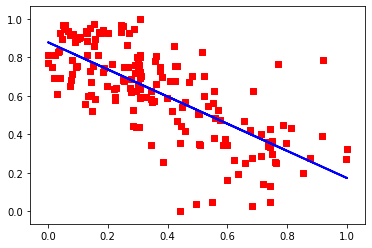

In [35]:
#With normalize Data
m_1.fit(X_1.iloc[:,1:2],y_1)
plt.scatter(x=X_1.iloc[:,1:2],y=y_1,c='r',marker='s')
plt.plot(X_1.iloc[:,1:2],m_1.predict(X_1.iloc[:,1:2]),'k',color='blue',linewidth=2)


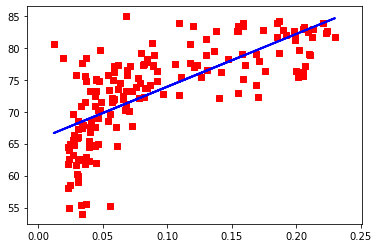

In [34]:
#With no normalize
m_2.fit(X_2.iloc[:,2:3],y_2)
plt.scatter(x=X_2.iloc[:,2:3],y=y_2,c='r',marker='s')
plt.plot(X_2.iloc[:,2:3],m_2.predict(X_2.iloc[:,2:3]),'k',color='blue',linewidth=2)

In [20]:
#Mean השונות של  NORMALIZED DATA
m_1.fit(X_1,y_1)
y_predct_1=m_1.predict(X_1)
mean_error=mean_squared_error(y_1.tolist(),y_predct_1)
print(mean_error)

0.006172519020765776


In [21]:
#Mean השונות של  NOT NORMALIZED DATA
m_2.fit(X_2,y_2)
y_predct_2=m_2.predict(X_2)
mean_error=mean_squared_error(y_2.tolist(),y_predct_2)
print(mean_error)

5.889006234954308


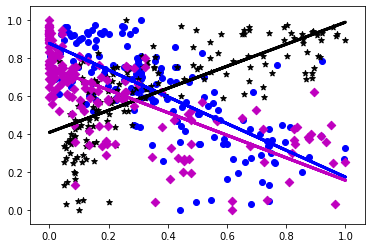

In [30]:
##NORMALIZED DATA Graph of vectors
#3 linear rows that in data
m_1_2=linear_model.LinearRegression()
m_1_3=linear_model.LinearRegression()
m_1_4=linear_model.LinearRegression()
m_1_2.fit(X_1.iloc[:,1:2],y_1)
m_1_3.fit(X_1.iloc[:,2:3],y_1)
m_1_4.fit(X_1.iloc[:,3:4],y_1)
plt.scatter(x=X_1.iloc[:,1:2],y=y_1,c='b',marker='o')
plt.scatter(x=X_1.iloc[:,2:3],y=y_1,c='k',marker='*')
plt.scatter(x=X_1.iloc[:,3:4],y=y_1,c='m',marker='D')
plt.plot(X_1.iloc[:,1:2],m_1_2.predict(X_1.iloc[:,1:2].values.reshape(X_1.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_1.iloc[:,2:3],m_1_3.predict(X_1.iloc[:,2:3].values.reshape(X_1.iloc[:,2:3].shape[0],1)),c='k',linewidth=3)
plt.plot(X_1.iloc[:,3:4],m_1_4.predict(X_1.iloc[:,3:4].values.reshape(X_1.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)


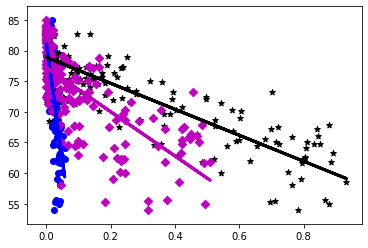

In [31]:
#Not Normalized Vectors 
#3 linear rows that in data
m_2_2=linear_model.LinearRegression()
m_2_3=linear_model.LinearRegression()
m_2_4=linear_model.LinearRegression()
m_2_1.fit(X_2.iloc[:,0:1],y_2)
m_2_2.fit(X_2.iloc[:,1:2],y_2)
m_2_3.fit(X_2.iloc[:,5:6],y_2)
m_2_4.fit(X_2.iloc[:,3:4],y_2)
plt.scatter(x=X_2.iloc[:,1:2],y=y_2,c='b',marker='o')
plt.scatter(x=X_2.iloc[:,5:6],y=y_2,c='k',marker='*')
plt.scatter(x=X_2.iloc[:,3:4],y=y_2,c='m',marker='D')
plt.plot(X_2.iloc[:,1:2],m_2_2.predict(X_2.iloc[:,1:2].values.reshape(X_2.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_2.iloc[:,5:6],m_2_3.predict(X_2.iloc[:,5:6].values.reshape(X_2.iloc[:,5:6].shape[0],1)),c='k',linewidth=3)
plt.plot(X_2.iloc[:,3:4],m_2_4.predict(X_2.iloc[:,3:4].values.reshape(X_2.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)